In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('var3.csv',sep = ';')
for col in data.columns:
    data[col] = data[col].apply(lambda x : np.float64(x.replace(',','.')))
data

,x1,x2,x3,x4
0,-2.466608,-2.169330,0.555083,-5.607257
1,-1.903084,-0.435904,2.602455,-4.062201
2,-2.360614,-1.522014,-1.201503,-5.535018
3,-1.539594,-3.177756,-3.921818,-2.808404
4,-3.410123,-2.666744,3.766256,-6.686347
...,...,...,...,...
395,-0.042161,1.103238,-3.794732,-1.669102
396,-1.145019,-2.930812,0.821277,-3.236626
397,-2.224031,-3.581077,1.898329,-5.111623
398,-1.577611,-3.143147,-0.935098,-3.614659


In [3]:
data.describe()

,x1,x2,x3,x4
count,400.000000,400.000000,400.000000,400.000000
mean,-1.794282,-1.542151,-0.646394,-4.054898
std,0.960916,1.949778,2.749625,1.787936
min,-4.209564,-7.501997,-9.500289,-8.582833
25%,-2.430307,-2.811930,-2.260312,-5.293063
50%,-1.788386,-1.409231,-0.614851,-3.986814
75%,-1.144573,-0.416285,1.004170,-2.761507
max,2.263848,4.027361,9.704518,3.881178


<AxesSubplot:>

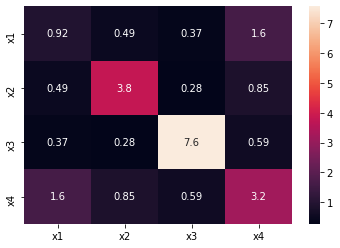

In [4]:
sns.heatmap(data.cov(), annot = True)

<AxesSubplot:>

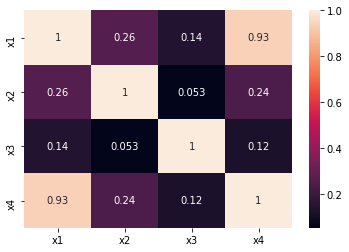

In [5]:
sns.heatmap(data.corr(), annot = True)

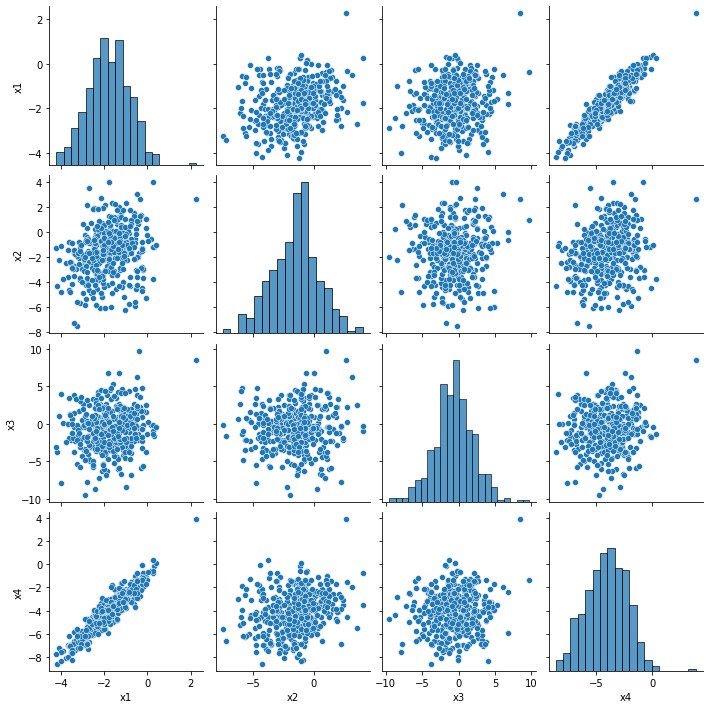

In [6]:
sns.pairplot(data)

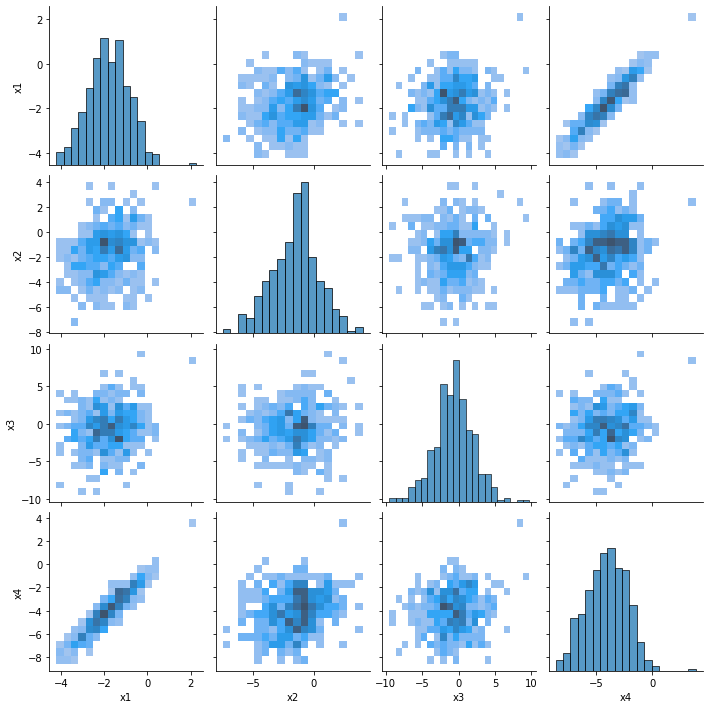

In [7]:
sns.pairplot(data,kind = 'hist')

## Kolmogorov - Smirnov test
## $X \sim N(\mu,\sigma)$

In [8]:
from scipy.stats import ks_1samp
from scipy.stats import norm

In [9]:
for col in data.columns:
    X = data[col]
    print(col + f' : {ks_1samp(x = X, cdf = norm.cdf, args = (X.mean(), X.std()))}')

x1 : KstestResult(statistic=0.030377402292124933, pvalue=0.8429371059225467)
x2 : KstestResult(statistic=0.053037866110516196, pvalue=0.20314460790405864)
x3 : KstestResult(statistic=0.04313509846816391, pvalue=0.43411213268755333)
x4 : KstestResult(statistic=0.026688244442565012, pvalue=0.9308120894412394)


## $X \sim Laplace(\mu, \sigma)$

In [10]:
from scipy.stats import laplace

In [11]:
def mean_median_deviation(X):
    med = np.median(X)
    return np.mean(np.abs(X - med))

for col in data.columns:
    X = data[col]
    print(col + f' : {ks_1samp(x = X, cdf = laplace.cdf, args = (X.mean(), mean_median_deviation(X)))}')

x1 : KstestResult(statistic=0.06971412533174692, pvalue=0.03902770334609873)
x2 : KstestResult(statistic=0.06134027217328053, pvalue=0.09453032133633654)
x3 : KstestResult(statistic=0.03736257215708527, pvalue=0.6180737555966693)
x4 : KstestResult(statistic=0.06665466085574057, pvalue=0.054630110278936383)


In [12]:
from scipy.stats import cauchy

In [13]:
for col in data.columns:
    X = data[col]
    print(col + f' : {ks_1samp(x = X, cdf = laplace.cdf, args = ())}')

x1 : KstestResult(statistic=0.6254405528129493, pvalue=1.01550401942806e-151)
x2 : KstestResult(statistic=0.4505142260570907, pvalue=1.277956764964915e-74)
x3 : KstestResult(statistic=0.2565433510419114, pvalue=1.060233272430034e-23)
x4 : KstestResult(statistic=0.8307214376587752, pvalue=5.378692962390888e-307)


## Shapiro-Wilk test

In [14]:
from scipy.stats import shapiro

In [15]:
for col in data.columns:
    X = data[col]
    print(col + f' : {shapiro(X)}')

x1 : ShapiroResult(statistic=0.9934315085411072, pvalue=0.07933632284402847)
x2 : ShapiroResult(statistic=0.9947327375411987, pvalue=0.18829059600830078)
x3 : ShapiroResult(statistic=0.9924971461296082, pvalue=0.042173441499471664)
x4 : ShapiroResult(statistic=0.9915582537651062, pvalue=0.022398198023438454)


## Anderson-Darling test

In [16]:
from scipy.stats import anderson

In [17]:
dist = 'norm'
for col in data.columns:
    X = data[col]
    print(col + f' : {anderson(X, dist)}\n')

x1 : AndersonResult(statistic=0.3223489857189179, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

x2 : AndersonResult(statistic=0.9267141426487342, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

x3 : AndersonResult(statistic=0.816583946318417, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

x4 : AndersonResult(statistic=0.3955570602173566, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))



In [18]:
data[['x1','x2']].corr()

,x1,x2
x1,1.000000,0.260797
x2,0.260797,1.000000


In [19]:
import itertools

In [20]:
SIGMA = {}
for x,y in itertools.combinations(data.columns, 2):
    SIGMA[x+y] = data[[x,y]].cov()
SIGMA

{'x1x2':           x1        x2
 x1  0.923360  0.488622
 x2  0.488622  3.801635,
 'x1x3':           x1        x3
 x1  0.923360  0.366277
 x3  0.366277  7.560436,
 'x1x4':           x1        x4
 x1  0.923360  1.605874
 x4  1.605874  3.196716,
 'x2x3':           x2        x3
 x2  3.801635  0.281705
 x3  0.281705  7.560436,
 'x2x4':           x2        x4
 x2  3.801635  0.849693
 x4  0.849693  3.196716,
 'x3x4':           x3        x4
 x3  7.560436  0.586968
 x4  0.586968  3.196716}

In [21]:
SIGMA['x1x2']

,x1,x2
x1,0.923360,0.488622
x2,0.488622,3.801635


In [22]:
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from pylab import rcParams

In [23]:
def error_ellipses(x, y):
    cov = SIGMA[x.name + y.name]
    
    eig_val, vec = np.linalg.eig(cov)
    eig_val = np.sqrt(eig_val)

    figure = plt.subplot()

    for i in range(1, 4):
        ellips = Ellipse(xy = (x.mean(), y.mean()),
                      width = eig_val[0] * 1.75*i, height = eig_val[1] * 1.75*i,
                      angle = np.degrees(np.arctan2(*vec[:, 0][::-1])))
        ellips.fill = False
        figure.add_artist(ellips)

    plt.scatter(x, y)
    plt.show()

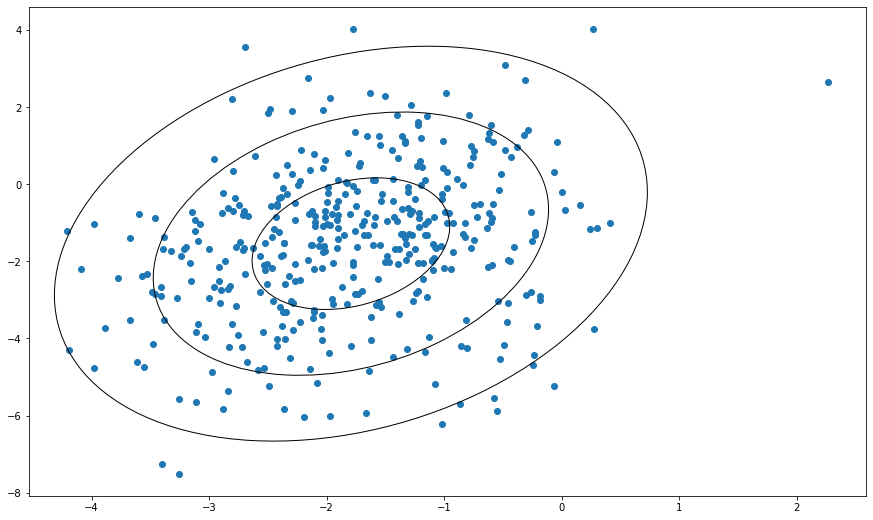

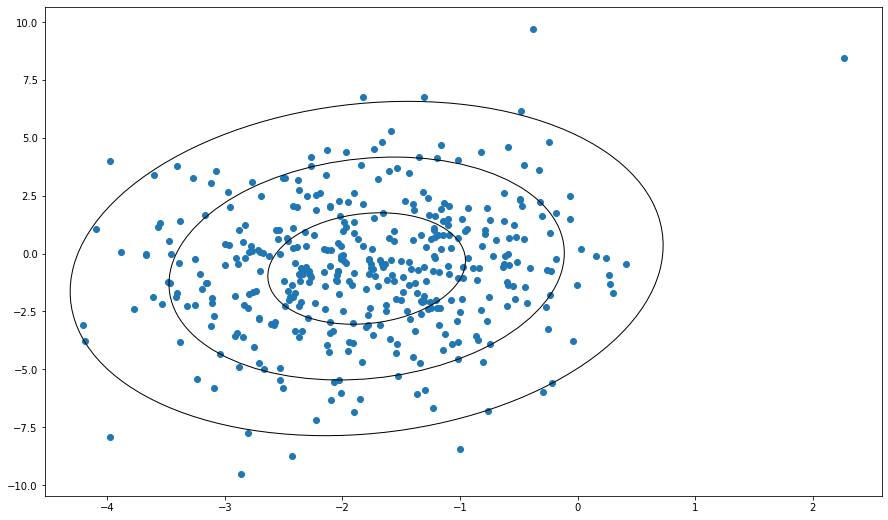

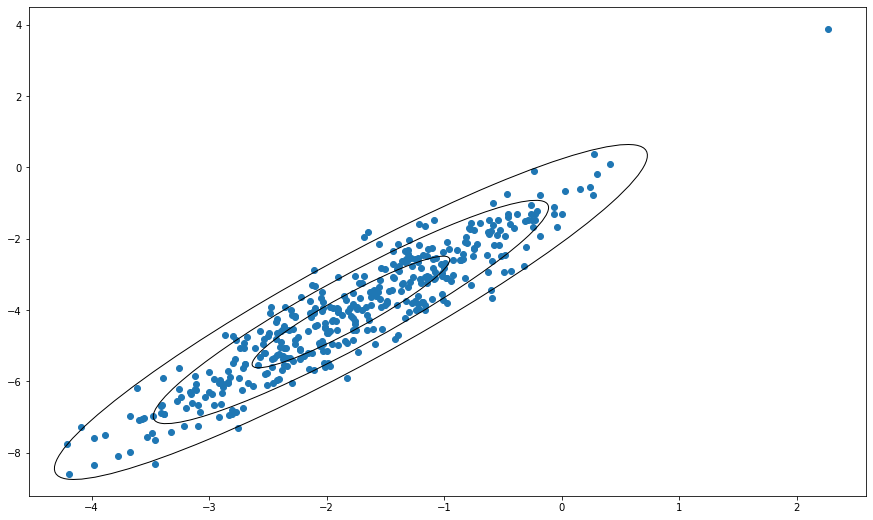

In [24]:
rcParams['figure.figsize'] = 15,9
error_ellipses(data['x1'], data['x2'])
error_ellipses(data['x1'], data['x3'])
error_ellipses(data['x1'], data['x4'])

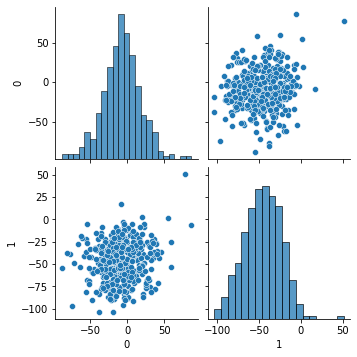

In [25]:
k = [0,1,6,9,9]
C = np.array([[1, 0, 9, 0],[0, 6, 0, 9]])
X = data.to_numpy()
Y = X@C.T
dy = pd.DataFrame(data = Y, index = np.arange(len(Y)))
sns.pairplot(dy)

<AxesSubplot:>

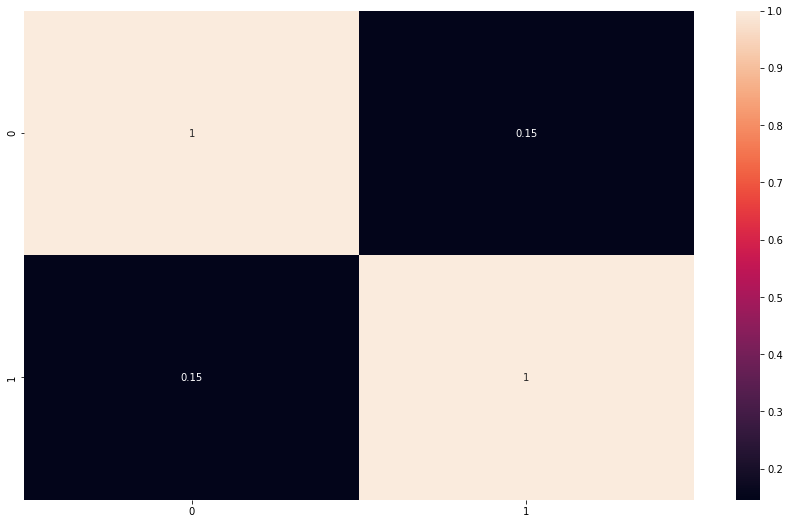

In [26]:
sns.heatmap(dy.corr(), annot = True)

## KS-test for $N(\mu,\sigma)$

In [27]:
for col in dy.columns:
    X = dy[col]
    print('y' + str(col) + f' : {ks_1samp(x = X, cdf = norm.cdf, args = (X.mean(), X.std()))}')

y0 : KstestResult(statistic=0.04479566181285036, pvalue=0.3870312089776934)
y1 : KstestResult(statistic=0.038091301081443096, pvalue=0.5936482490161785)


In [28]:
from statsmodels.stats.diagnostic import lilliefors

In [29]:
for col in dy.columns:
    X = dy[col]
    print(str(col) + ' norm :' + f'{lilliefors(X,dist)}')
    #print(str(col) + ' norm :' + f'{lilliefors(X,dist)}')

0 norm :(0.04479566181285036, 0.05251004105125816)
1 norm :(0.038091301081443096, 0.18812885382706168)


## Shapiro-Wilk test

In [30]:
for col in dy.columns:
    X = dy[col]
    print('y' + str(col) + f' : {shapiro(X)}')

y0 : ShapiroResult(statistic=0.9918992519378662, pvalue=0.028167270123958588)
y1 : ShapiroResult(statistic=0.9902212619781494, pvalue=0.009226647205650806)


## KS-test for $Laplace(\mu,\sigma)$

In [31]:
for col in dy.columns:
    X = dy[col]
    print('y' + str(col) + f' : {ks_1samp(x = X, cdf = laplace.cdf, args = (X.mean(), mean_median_deviation(X)))}')

y0 : KstestResult(statistic=0.03791198255137396, pvalue=0.599641732095129)
y1 : KstestResult(statistic=0.07633846209607642, pvalue=0.017893272283163158)


In [32]:
dy.cov()

,0,1
0,619.911633,80.141107
1,80.141107,487.559663


In [33]:
Cov = data.cov().to_numpy()
C@Cov@C.T

array([[619.9116333 ,  80.14110722],
       [ 80.14110722, 487.55966278]])

In [34]:
alpha = np.random.binomial(n = 1, p = 0.3, size = len(data))

In [43]:
data['x2'] += 5

In [44]:
mixture = alpha*data['x1'] + (1-alpha)*data['x2']
mixture

0      2.830670
1      4.564096
2      3.477986
3      1.822244
4     -3.410123
         ...   
395    6.103238
396    2.069188
397    1.418923
398    1.856853
399    3.094205
Length: 400, dtype: float64

In [45]:
mixture.describe()

count    400.000000
mean       1.810410
std        2.934506
min       -4.209564
25%       -0.859482
50%        2.260763
75%        4.057567
max        9.027361
dtype: float64

### $E(\alpha x_1 + (1-\alpha)x_2) = \alpha Ex_1 + (1-\alpha)Ex_2$     
### $\xi = \alpha x_1 + (1-\alpha)x_2$
### $D\xi = E\xi^2 - E^2\xi$      
### $E\xi^2 = \alpha^2Ex_1^2 + (1-\alpha)^2Ex_2^2+2(\alpha - \alpha^2)Ex_1x_2$       
### $Ex_1x_2 = cov(x_1,x_2) + Ex_1Ex_2$

In [46]:
mix_mean = alpha.mean()*data['x1'].mean() + (1-alpha).mean()*data['x2'].mean()
mix_mean

1.8822095760739368

In [47]:
X1, X2, p = data['x1'], data['x2'], 0.3
(alpha**2).mean()*(X1**2).mean() + ((1-alpha)**2).mean()*(X2**2).mean() + 2*(alpha - alpha**2).mean()*(data[['x1','x2']].cov().iloc[0,1] + X1.mean()*X2.mean()) - mix_mean**2

8.723630444320397

In [48]:
mixture.var()

8.611328031541637

<AxesSubplot:ylabel='Frequency'>

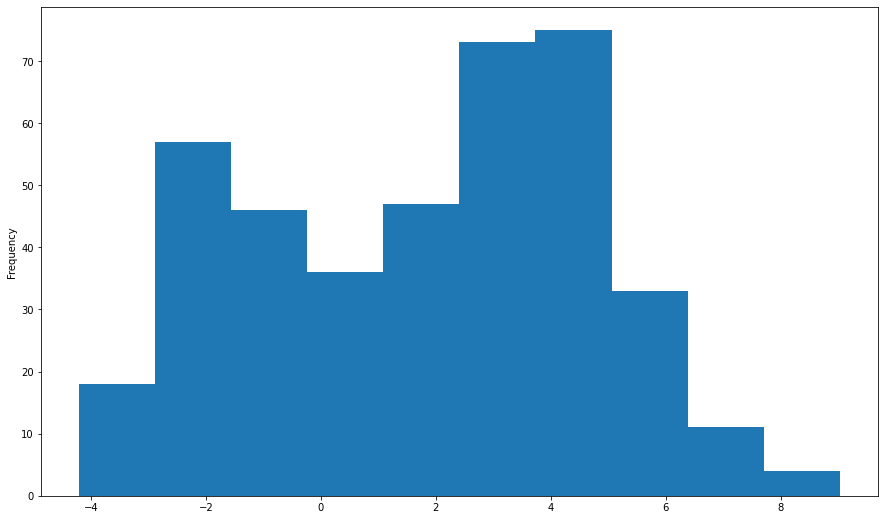

In [49]:
mixture.plot.hist()

In [50]:
ks_1samp(mixture, norm.cdf, args = (mixture.mean(), mixture.std()))

KstestResult(statistic=0.10033016102115389, pvalue=0.0005870161553376021)

In [51]:
ks_1samp(mixture, laplace.cdf, args = (mixture.median(), mean_median_deviation(mixture)))

KstestResult(statistic=0.13073283248366876, pvalue=2.0207306208426454e-06)

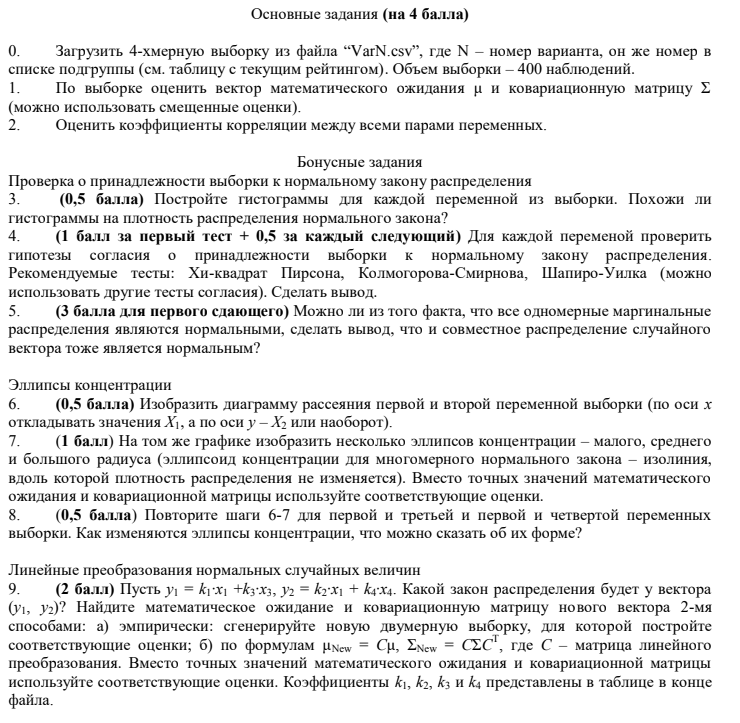

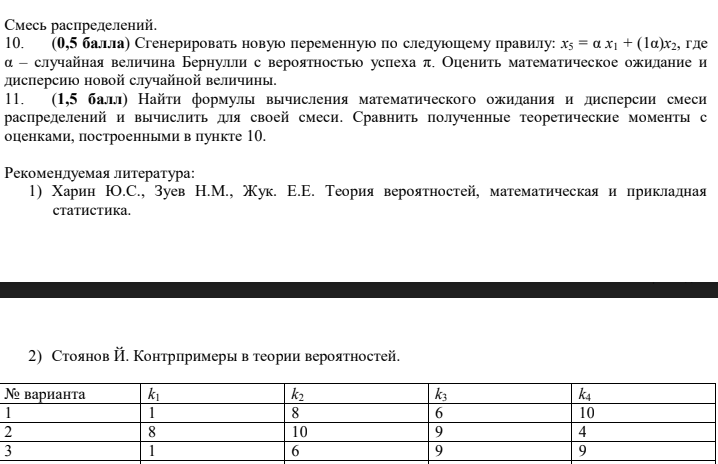